In [5]:
import numpy as np 
import pandas as pd 

In [6]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [8]:
df = pd.read_csv('C:/Users/thomb/Downloads/archive (6)/Student_performance_data _.csv')
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [9]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [10]:
df.tail()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0
2391,3392,16,1,0,2,17.819907,13,0,2,0,0,0,1,2.140014,1.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   object 
 3   Ethnicity          2392 non-null   object 
 4   ParentalEducation  2392 non-null   object 
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   object 
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   object 
dtypes: float64(2), int64(8), object(5)
memory usage: 280.4+ KB


In [13]:
df.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [19]:
gender = df['Gender']
ethnicity = df['Ethnicity']
parental_education = df['ParentalEducation']
parental_support = df['ParentalSupport']
grade_class = df['GradeClass']

columns_list = [gender, ethnicity, parental_education, parental_support, grade_class]
values_list = [[0, 1],
               [0, 1, 2, 3],
               [0, 1, 2, 3, 4],
               [0, 1, 2, 3, 4],
               [0, 1, 2, 3, 4]]
categories_val = [['Male', 'Female'],
                  ['Caucasian', 'African American', 'Asian', 'Other'],
                  ['None', 'High School', 'Some College', "Bachelor's", 'Higher'],
                  ['None', 'Low', 'Moderate', 'High', 'Very High'],
                  ['A', 'B', 'C', 'D', 'F']]

for columns, values, categories in zip(columns_list, values_list, categories_val):
    columns.replace(values, categories, inplace=True)

new_df = df.copy()
new_df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,Female,Caucasian,Some College,19.833723,7,1,Moderate,0,0,1,0,2.929196,C
1,1002,18,Male,Caucasian,High School,15.408756,0,0,Low,0,0,0,0,3.042915,B
2,1003,15,Male,Asian,Bachelor's,4.210570,26,0,Moderate,0,0,0,0,0.112602,F
3,1004,17,Female,Caucasian,Bachelor's,10.028829,14,0,High,1,0,0,0,2.054218,D
4,1005,17,Female,Caucasian,Some College,4.672495,17,1,High,0,0,0,0,1.288061,F


In [23]:
new_df.describe()

,StudentID,Age,StudyTimeWeekly,Absences,Tutoring,Extracurricular,Sports,Music,Volunteering,GPA
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,9.771992,14.541388,0.301421,0.383361,0.303512,0.196906,0.157191,1.906186
std,690.655244,1.123798,5.652774,8.467417,0.458971,0.486307,0.459870,0.397744,0.364057,0.915156
min,1001.000000,15.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,5.043079,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.174803
50%,2196.500000,16.000000,9.705363,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.893393
75%,2794.250000,17.000000,14.408410,22.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.622216
max,3392.000000,18.000000,19.978094,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [24]:
sns.set_style('whitegrid')

Text(0.5, 1.0, 'Bar Chart of Gender')

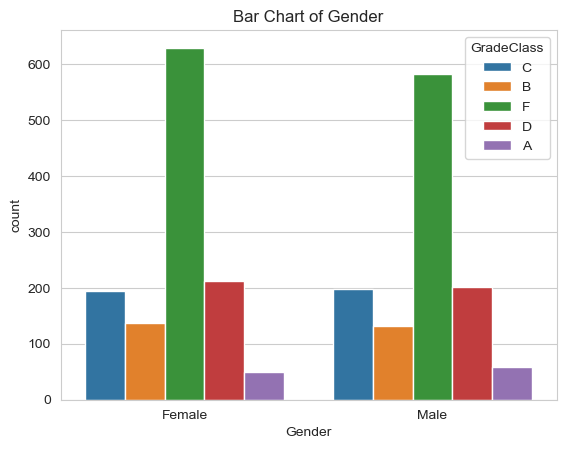

In [27]:
sns.countplot(data=new_df,x=new_df['Gender'],hue='GradeClass')
plt.title('Bar Chart of Gender')

Text(0.5, 1.0, 'Bar Chart of Ethinicity')

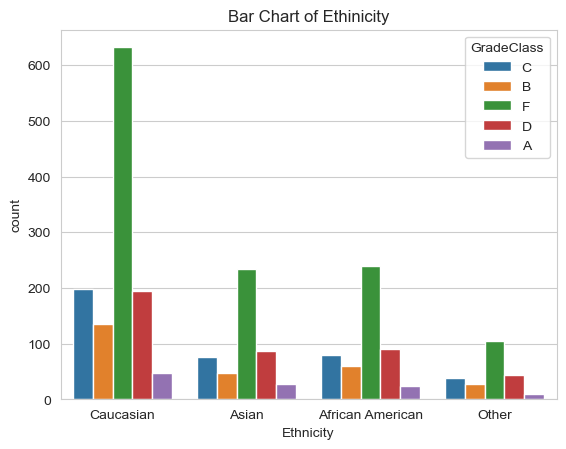

In [28]:
sns.countplot(data=new_df, x=new_df['Ethnicity'],hue='GradeClass')
plt.title("Bar Chart of Ethinicity")

Text(0.5, 1.0, 'Bar Chart of Parental Education')

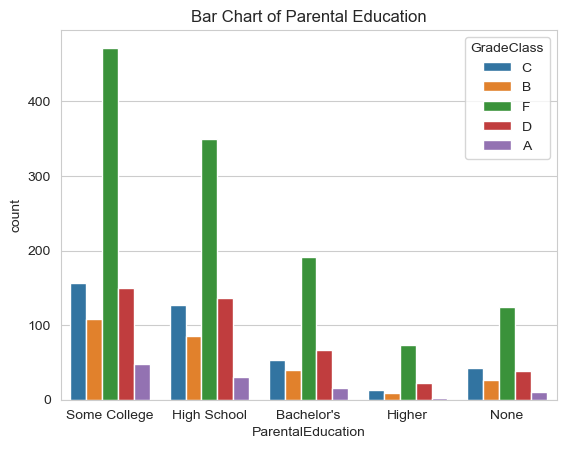

In [29]:
sns.countplot(data=new_df, x=new_df['ParentalEducation'], hue='GradeClass')
plt.title('Bar Chart of Parental Education')

Text(0.5, 1.0, 'Bar Chart of Parental Support')

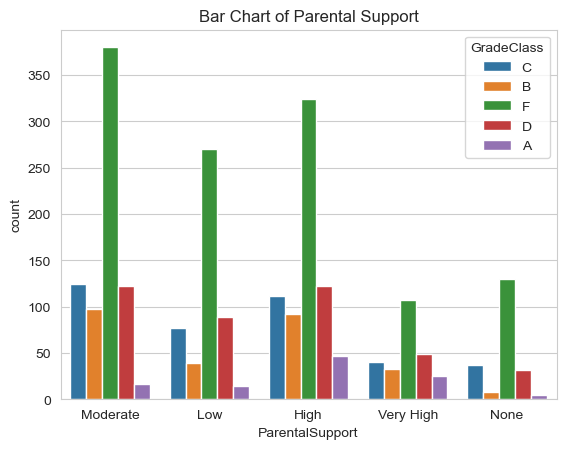

In [30]:
sns.countplot(data=new_df, x=new_df['ParentalSupport'], hue='GradeClass')
plt.title('Bar Chart of Parental Support')

Text(0.5, 1.0, 'Bar Chart of Age')

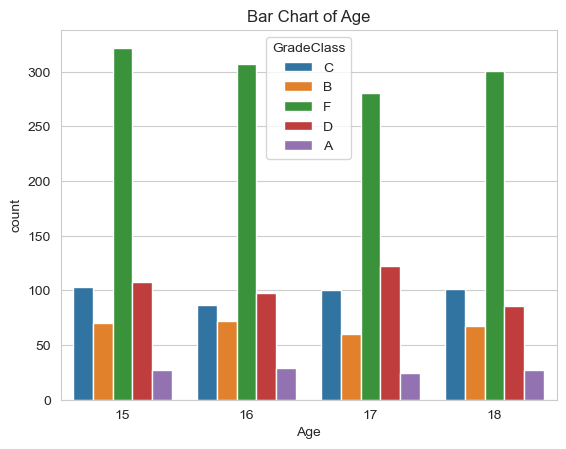

In [31]:
sns.countplot(data=new_df, x=new_df['Age'], hue='GradeClass')
plt.title('Bar Chart of Age')

C:\Users\thomb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histogram of Absences')

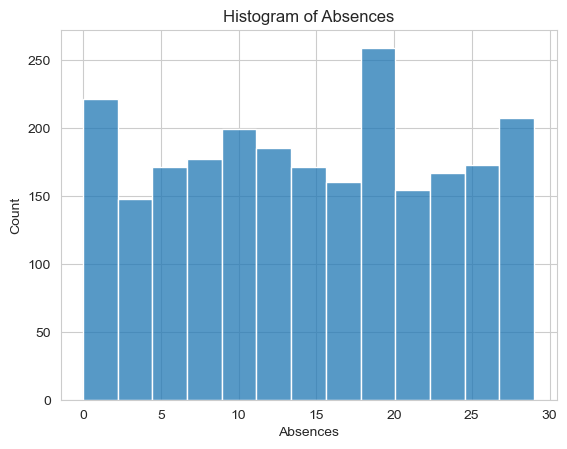

In [32]:
sns.histplot(data=new_df, x=new_df['Absences'])
plt.title('Histogram of Absences')

C:\Users\thomb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histogram of Study Time Weekly')

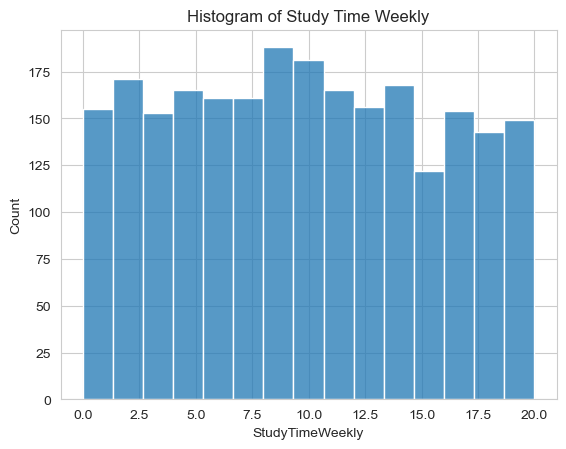

In [33]:
sns.histplot(data=new_df,x=new_df['StudyTimeWeekly'])
plt.title("Histogram of Study Time Weekly")

C:\Users\thomb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histrogram of GPA')

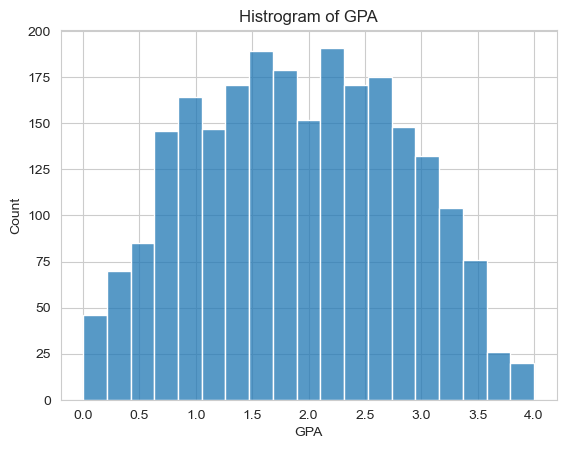

In [34]:
sns.histplot(data=new_df, x=new_df['GPA'])
plt.title('Histrogram of GPA')

Text(0.5, 1.0, 'Count plot of Grade Class')

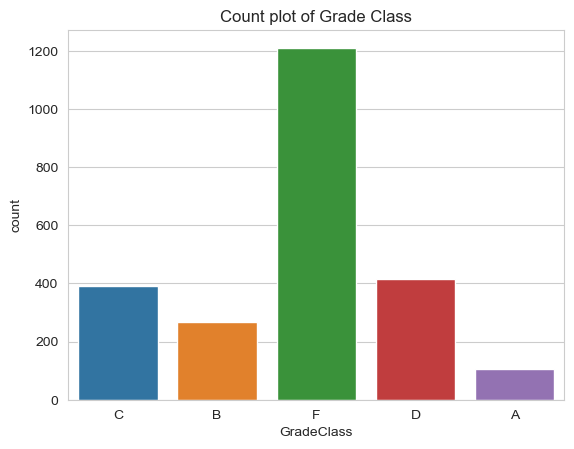

In [35]:
sns.countplot(data=new_df,x=new_df['GradeClass'])
plt.title("Count plot of Grade Class")

<Axes: title={'center': 'Scatter Plot of GPA vs Study Time Weekly with Grade Class'}, xlabel='GPA', ylabel='StudyTimeWeekly'>

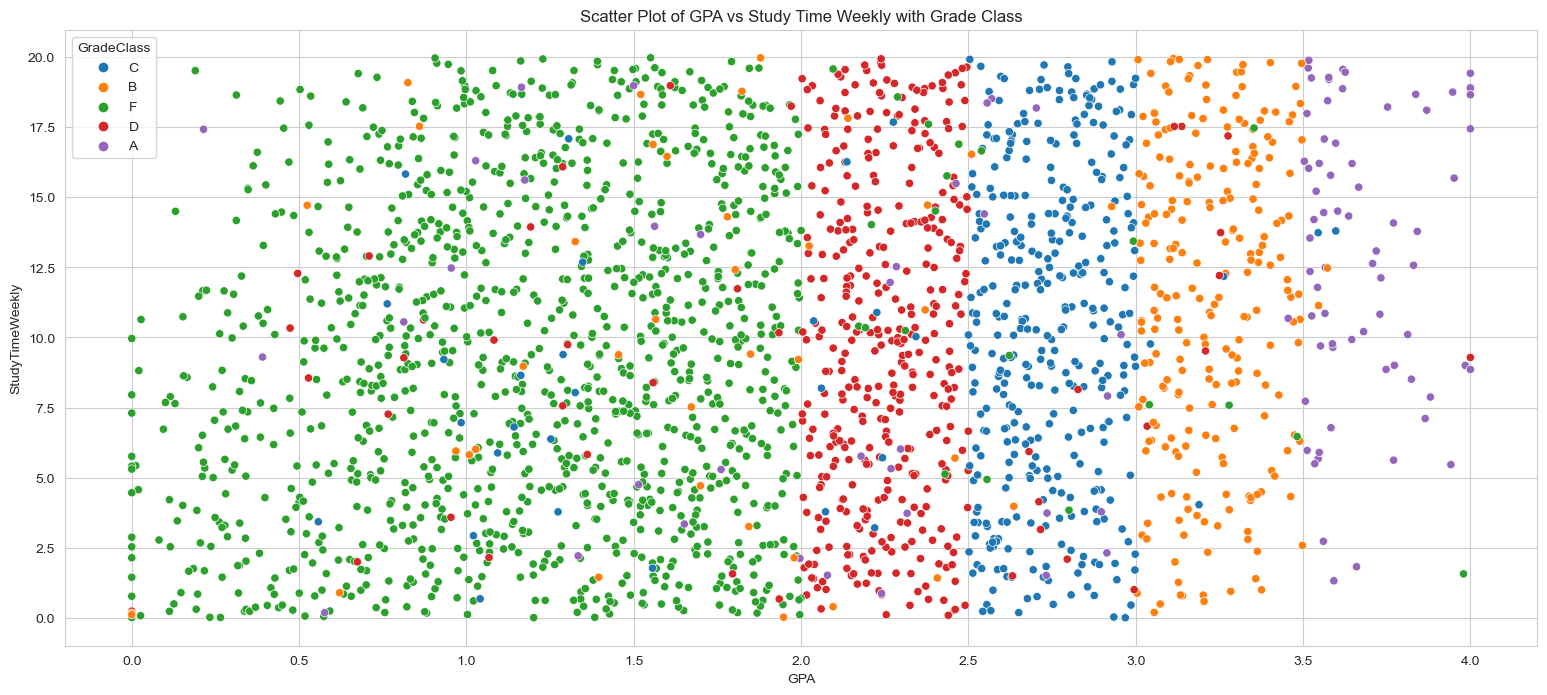

In [39]:
plt.figure(figsize=(19, 8))
plt.title('Scatter Plot of GPA vs Study Time Weekly with Grade Class')
sns.scatterplot(data=new_df, x='GPA', y='StudyTimeWeekly', hue='GradeClass')

<Axes: title={'center': 'Scatter Plot of GPA vs Study Time Weekly with Gender'}, xlabel='GPA', ylabel='StudyTimeWeekly'>

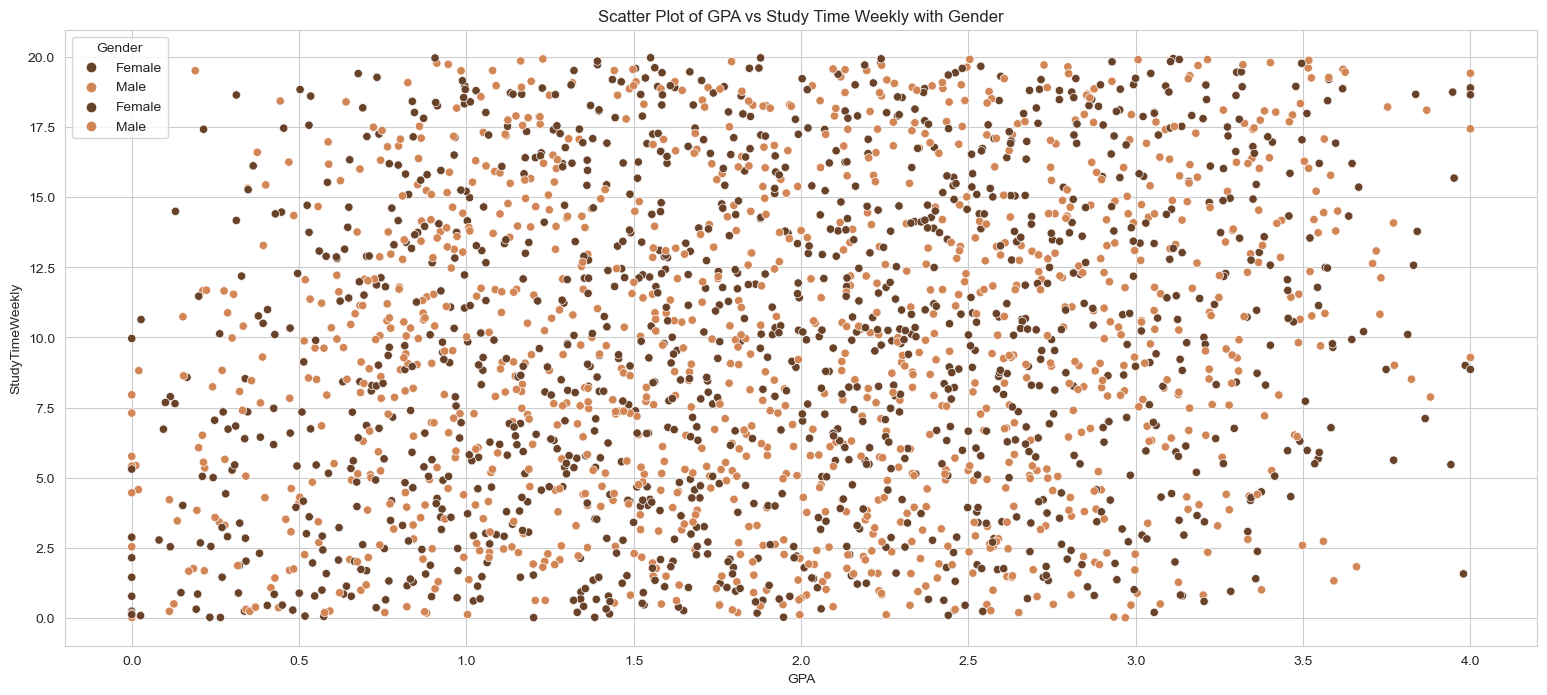

In [40]:
plt.figure(figsize=(19,8))
plt.title("Scatter Plot of GPA vs Study Time Weekly with Gender")
sns.scatterplot(data=new_df,x="GPA",y="StudyTimeWeekly",hue="Gender",palette="copper")
sns.scatterplot(data=new_df,x="GPA",y="StudyTimeWeekly",hue="Gender",palette="copper")

<Axes: title={'center': 'Scatter Plot of GPA vs Study Time Weekly with Parental Support'}, xlabel='GPA', ylabel='StudyTimeWeekly'>

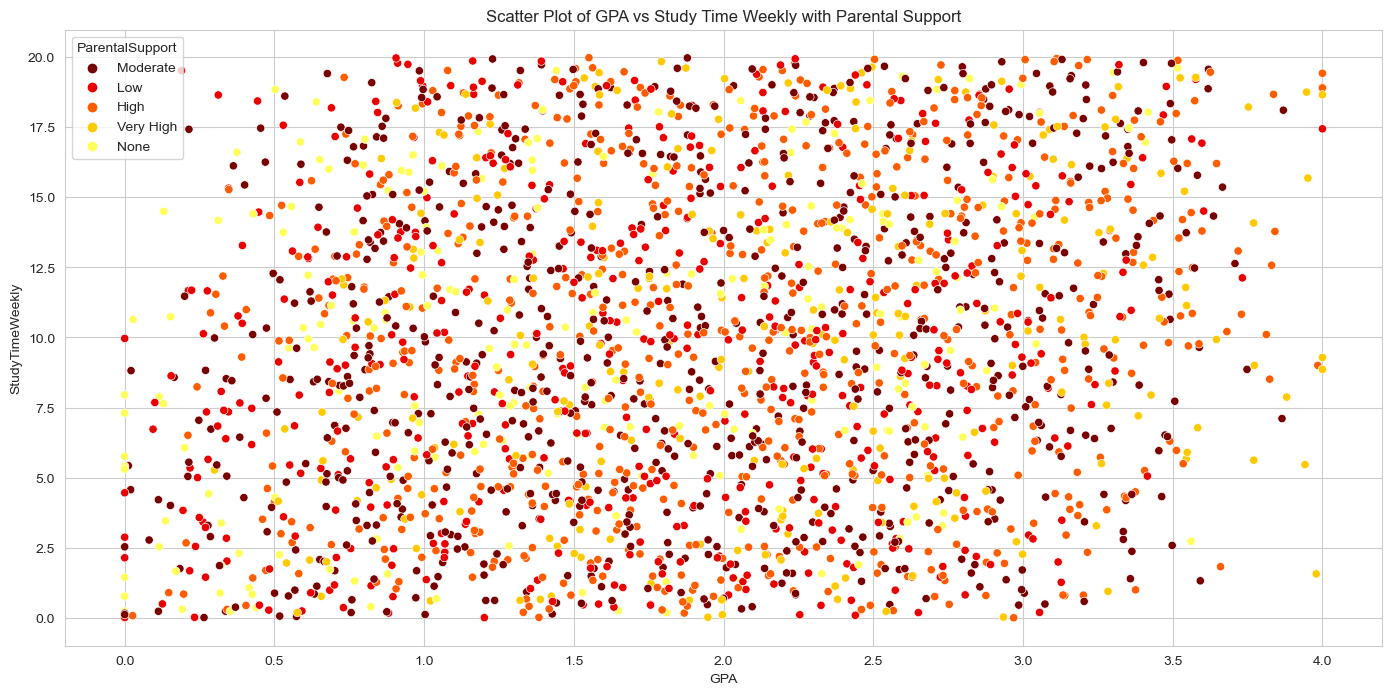

In [41]:
plt.figure(figsize=(17, 8))
plt.title('Scatter Plot of GPA vs Study Time Weekly with Parental Support')
sns.scatterplot(data=new_df, x='GPA', y='StudyTimeWeekly', hue='ParentalSupport', palette='hot')

<Axes: title={'center': 'Scatter Plot of GPA vs Study Time Weekly with Parental Education'}, xlabel='GPA', ylabel='StudyTimeWeekly'>

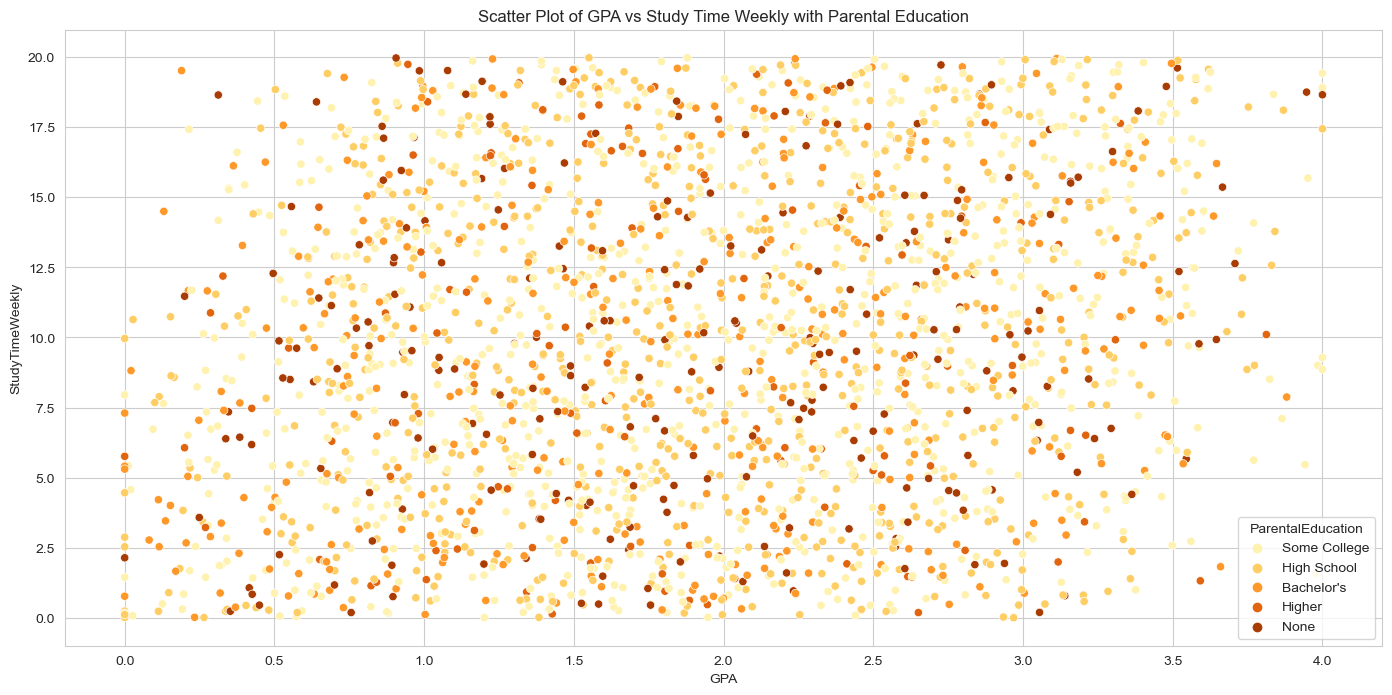

In [42]:
plt.figure(figsize=(17, 8))
plt.title('Scatter Plot of GPA vs Study Time Weekly with Parental Education')
sns.scatterplot(data=new_df, x='GPA', y='StudyTimeWeekly', hue='ParentalEducation', palette='YlOrBr')

C:\Users\thomb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thomb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ParentalEducation', ylabel='GPA'>

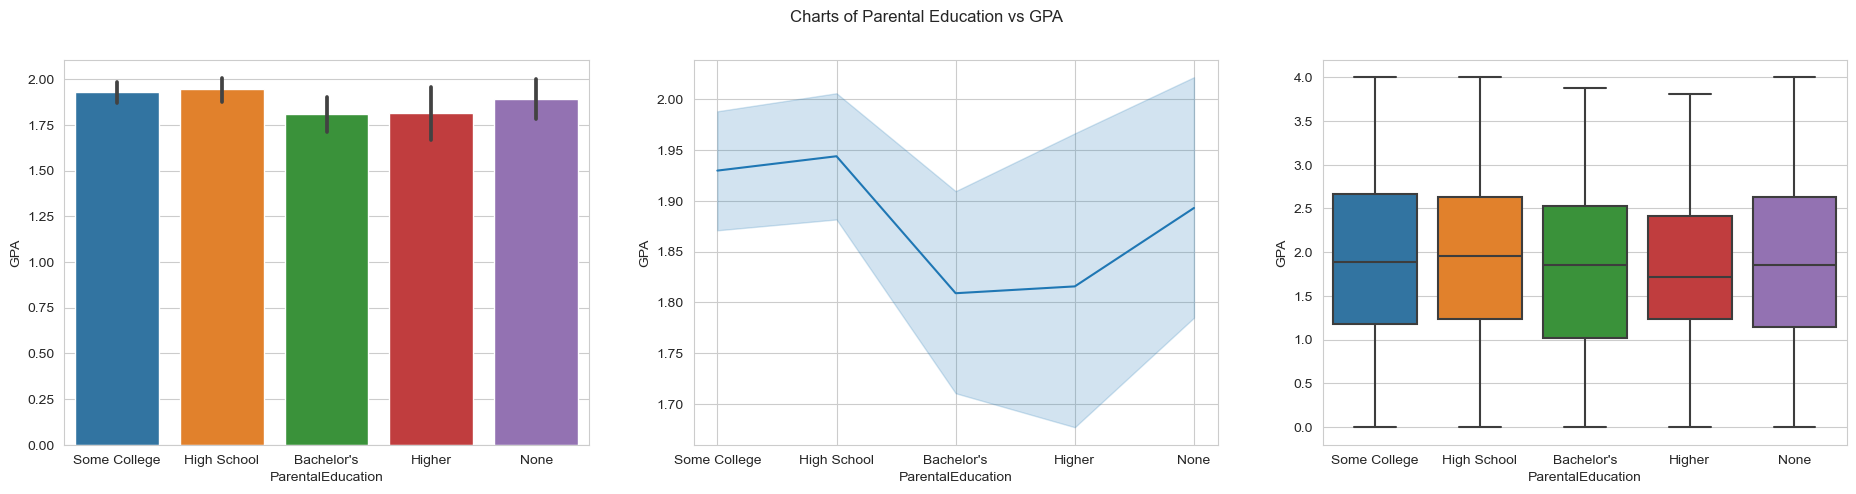

In [46]:
fig,ax=plt.subplots(1,3,figsize=(23,5))
fig.suptitle("Charts of Parental Education vs GPA")
sns.barplot(data=new_df,x="ParentalEducation",y="GPA",ax=ax[0])
sns.lineplot(data=new_df,x="ParentalEducation",y="GPA",ax=ax[1])
sns.boxplot(data=new_df,x="ParentalEducation",y="GPA",ax=ax[2])

C:\Users\thomb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thomb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GradeClass', ylabel='GPA'>

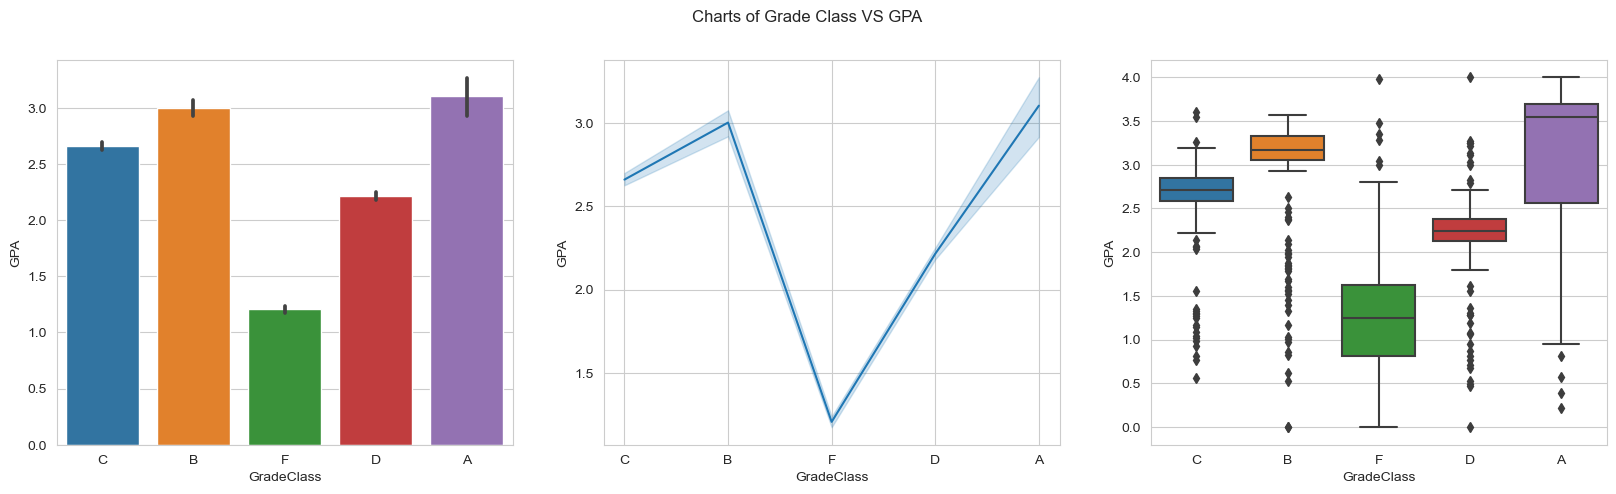

In [47]:
fig,ax=plt.subplots(1,3,figsize=(20,5))
fig.suptitle("Charts of Grade Class VS GPA")
sns.barplot(data=new_df,x="GradeClass",y="GPA",ax=ax[0])
sns.lineplot(data=new_df,x="GradeClass",y="GPA",ax=ax[1])
sns.boxplot(data=new_df,x="GradeClass",y="GPA",ax=ax[2])

C:\Users\thomb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thomb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Tutoring', ylabel='GPA'>

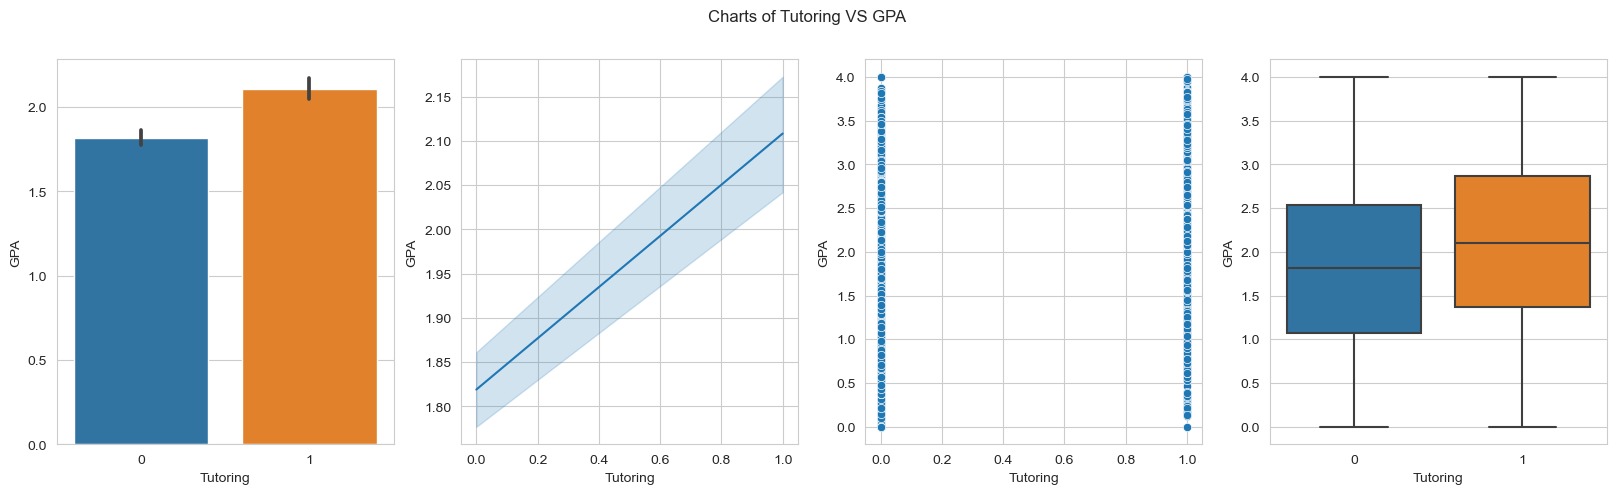

In [49]:
fig,ax=plt.subplots(1,4,figsize=(20,5))
fig.suptitle("Charts of Tutoring VS GPA")
sns.barplot(data=new_df,x="Tutoring",y="GPA",ax=ax[0])
sns.lineplot(data=new_df,x="Tutoring",y="GPA",ax=ax[1])
sns.scatterplot(data=new_df,x="Tutoring",y="GPA",ax=ax[2])
sns.boxplot(data=new_df,x="Tutoring",y="GPA",ax=ax[3])

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Charts of Parental Support vs GPA')
sns.barplot(data=new_df, x='ParentalSupport', y='GPA', ax=ax[0])
sns.lineplot(data=new_df, x='ParentalSupport', y='GPA', ax=ax[1])
sns.boxplot(data=new_df, x='ParentalSupport', y='GPA', ax=ax[2])

C:\Users\thomb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thomb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ParentalSupport', ylabel='GPA'>

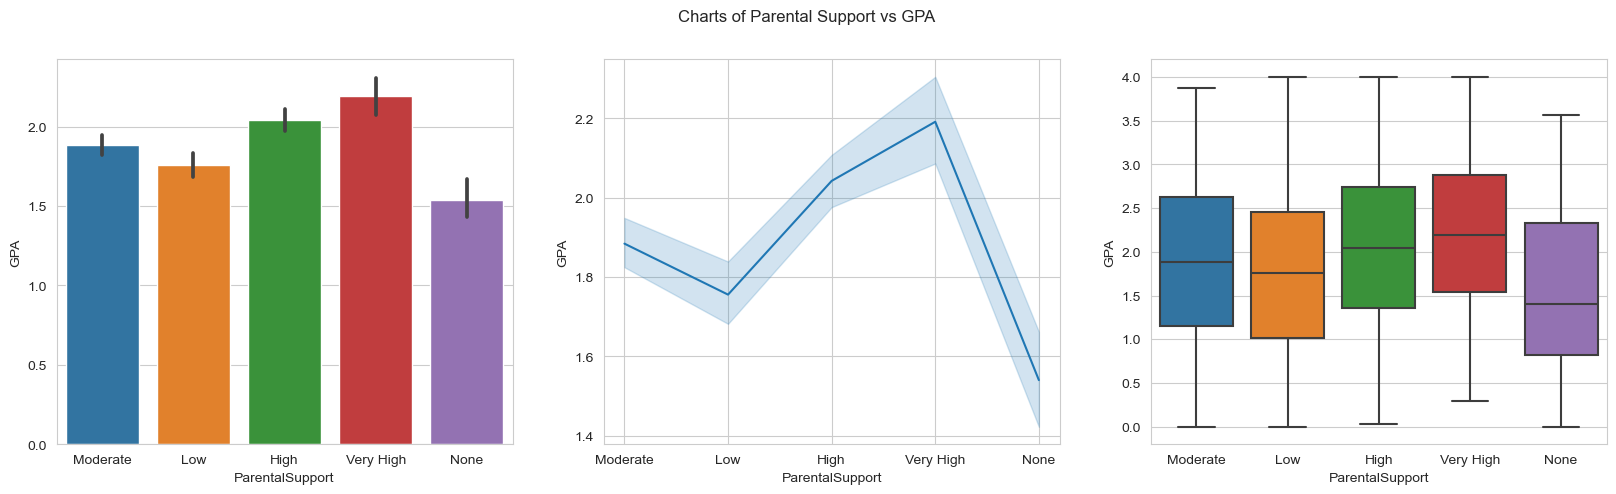

In [51]:
fig,ax=plt.subplots(1,3,figsize=(20,5))
fig.suptitle("Charts of Parental Support vs GPA")
sns.barplot(data=new_df,x="ParentalSupport",y="GPA",ax=ax[0])
sns.lineplot(data=new_df,x="ParentalSupport",y="GPA",ax=ax[1])
sns.boxplot(data=new_df,x="ParentalSupport",y="GPA",ax=ax[2])

C:\Users\thomb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thomb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Ethnicity', ylabel='GPA'>

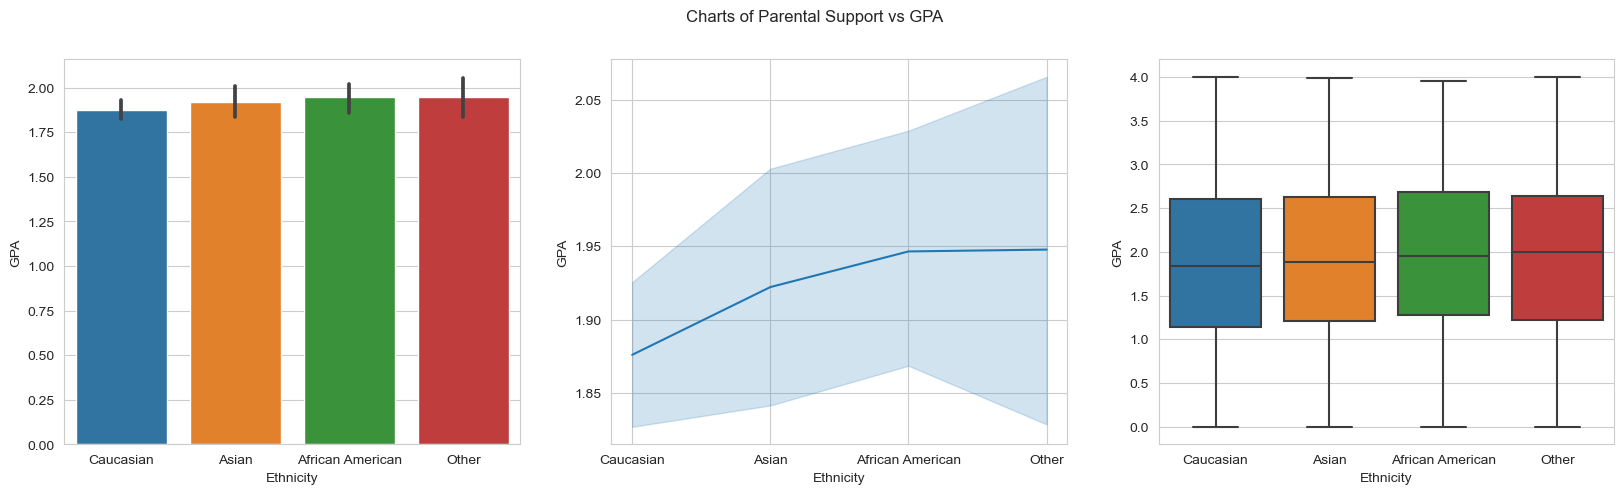

In [52]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Charts of Parental Support vs GPA')
sns.barplot(data=new_df, x='Ethnicity', y='GPA', ax=ax[0])
sns.lineplot(data=new_df, x='Ethnicity', y='GPA', ax=ax[1])
sns.boxplot(data=new_df, x='Ethnicity', y='GPA', ax=ax[2])

C:\Users\thomb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thomb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Gender', ylabel='GPA'>

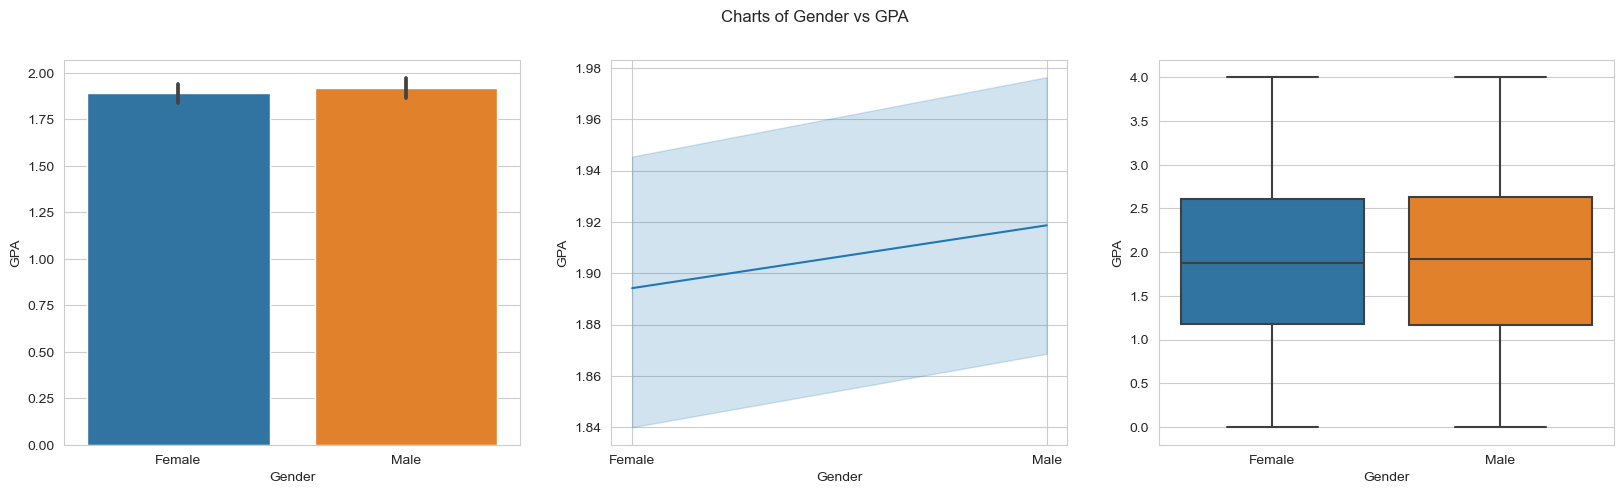

In [53]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Charts of Gender vs GPA')
sns.barplot(data=new_df, x='Gender', y='GPA', ax=ax[0])
sns.lineplot(data=new_df, x='Gender', y='GPA', ax=ax[1])
sns.boxplot(data=new_df, x='Gender', y='GPA', ax=ax[2])

<Axes: >

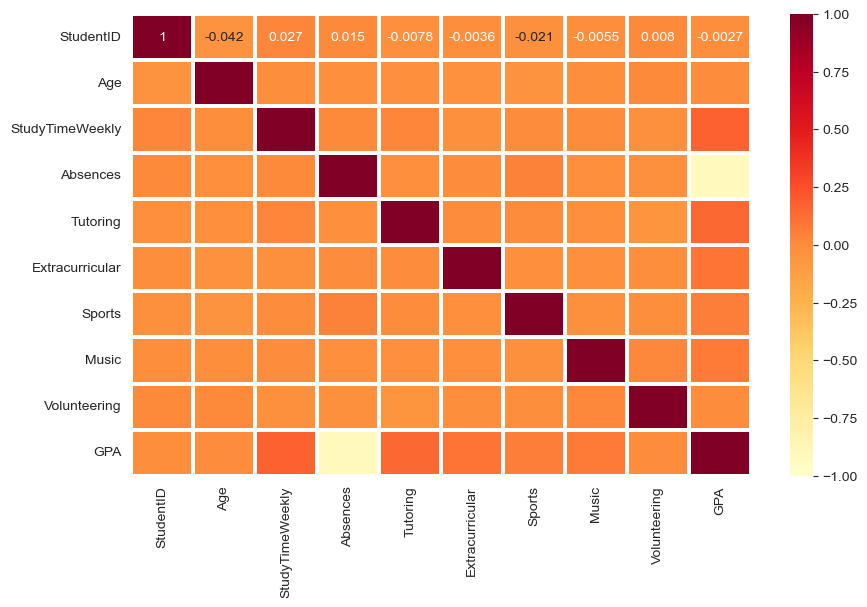

In [54]:
plt.figure(figsize=(10,6))
sns.heatmap(new_df.corr(numeric_only=True),cmap='YlOrRd',annot=True,vmin=-1,vmax=1,center=0,linewidth=1.5)

C:\Users\thomb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thomb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thomb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thomb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

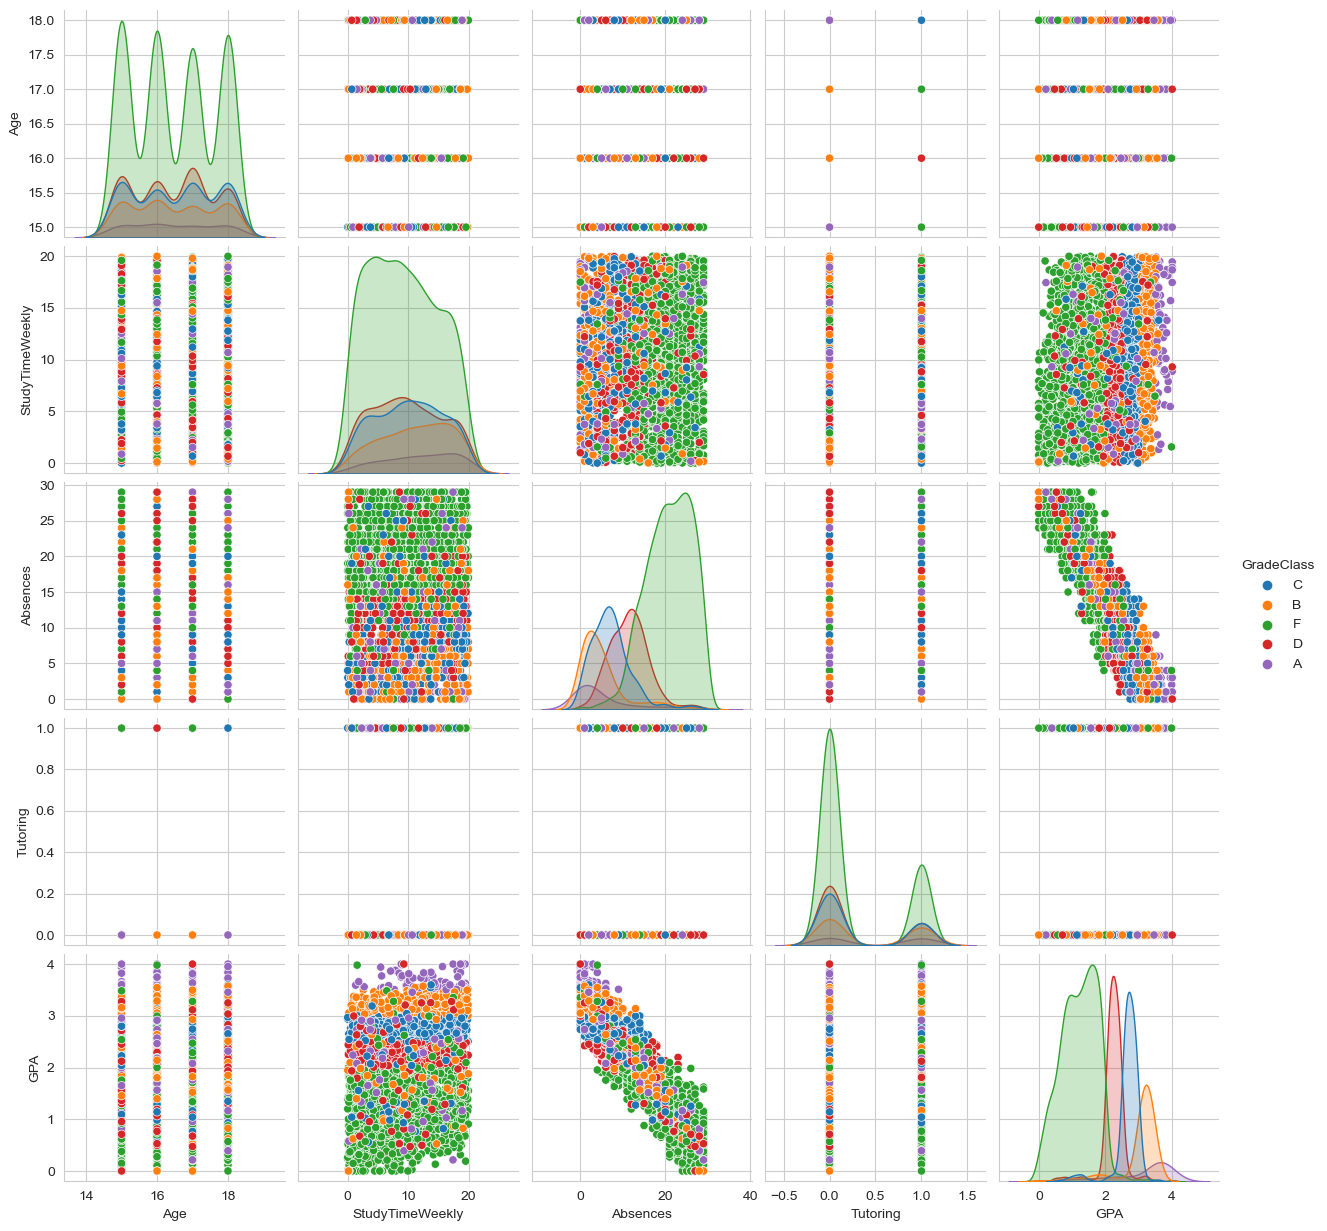

In [56]:
sns.pairplot(data=new_df,vars=['Age','StudyTimeWeekly','Absences','Tutoring','GPA'],diag_kind='kde',hue="GradeClass")

In [57]:
new_df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,Female,Caucasian,Some College,19.833723,7,1,Moderate,0,0,1,0,2.929196,C
1,1002,18,Male,Caucasian,High School,15.408756,0,0,Low,0,0,0,0,3.042915,B
2,1003,15,Male,Asian,Bachelor's,4.210570,26,0,Moderate,0,0,0,0,0.112602,F
3,1004,17,Female,Caucasian,Bachelor's,10.028829,14,0,High,1,0,0,0,2.054218,D
4,1005,17,Female,Caucasian,Some College,4.672495,17,1,High,0,0,0,0,1.288061,F


In [ ]:
parental_support = new_df['ParentalSupport']
grade_class = new_df['GradeClass']

columns_lists = [parental_support, grade_class]
values_lists = [['None', 'Low', 'Moderate', 'High', 'Very High'],
                ['A', 'B', 'C', 'D', 'F']]
categories_vals = [[0, 1, 2, 3, 4],
                   [0.0, 1.0, 2.0, 3.0, 4.0]]

for columns1, values1, categories1 in zip(columns_lists, values_lists, categories_vals):
    columns1.replace(values1, categories1, inplace=True)

new_data = new_df.copy()
new_data.head()

In [59]:
parental_support=new_df['ParentalSupport']
grade_class=new_df['GradeClass']
columns_lists=[parental_support,grade_class]
values_lists=[['None','Low','Moderate','High','Very High'],
             ['A','B','C','D','F']]
categories_vals=[[0,1,2,3,4],
                [0.0,1.0,2.0,3.0,4.0]]
for columns1,values1,categories1 in zip(columns_list,values_lists,categories_vals):
    columns1.replace(values1,categories1,inplace=True)
new_data=new_df.copy()
new_data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,Female,Caucasian,Some College,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,Male,Caucasian,High School,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,Male,Asian,Bachelor's,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,Female,Caucasian,Bachelor's,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,Female,Caucasian,Some College,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [60]:
one_hot_encoding = pd.get_dummies(new_data)
new_dataset = one_hot_encoding.copy()
new_dataset

,StudentID,Age,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,...,Gender_Male,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Other,ParentalEducation_Bachelor's,ParentalEducation_High School,ParentalEducation_Higher,ParentalEducation_None,ParentalEducation_Some College
0,1001,17,19.833723,7,1,2,0,0,1,0,...,False,False,False,True,False,False,False,False,False,True
1,1002,18,15.408756,0,0,1,0,0,0,0,...,True,False,False,True,False,False,True,False,False,False
2,1003,15,4.210570,26,0,2,0,0,0,0,...,True,False,True,False,False,True,False,False,False,False
3,1004,17,10.028829,14,0,3,1,0,0,0,...,False,False,False,True,False,True,False,False,False,False
4,1005,17,4.672495,17,1,3,0,0,0,0,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,10.680555,2,0,4,1,0,0,0,...,False,False,False,True,False,True,False,False,False,False
2388,3389,17,7.583217,4,1,4,0,1,0,0,...,True,False,False,True,False,False,True,False,False,False
2389,3390,16,6.805500,20,0,2,0,0,0,1,...,False,False,False,True,False,False,False,False,False,True
2390,3391,16,12.416653,17,0,2,0,1,1,0,...,False,True,False,False,False,False,False,False,True,False


In [61]:
clean_data = new_dataset.replace({True: 1, False: 0})
clean_data.rename(columns={
    'Gender_Female': 'Female',
    'Gender_Male': 'Male',
    'Ethnicity_African American': 'E_African_American',
    'Ethnicity_Asian': 'E_Asian',
    'Ethnicity_Caucasian': 'E_Caucasian',
    'Ethnicity_Other': 'E_Other',
    "ParentalEducation_Bachelor's": "PE_Bachelor's",
    'ParentalEducation_High School': 'PE_High_School', 
    'ParentalEducation_Higher': 'PE_Higher', 
    'ParentalEducation_None': 'PE_None',
    'ParentalEducation_Some College': 'PE_Some_College'
}, inplace=True)
clean_data

,StudentID,Age,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,...,Male,E_African_American,E_Asian,E_Caucasian,E_Other,PE_Bachelor's,PE_High_School,PE_Higher,PE_None,PE_Some_College
0,1001,17,19.833723,7,1,2,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,1002,18,15.408756,0,0,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
2,1003,15,4.210570,26,0,2,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
3,1004,17,10.028829,14,0,3,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,1005,17,4.672495,17,1,3,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,10.680555,2,0,4,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2388,3389,17,7.583217,4,1,4,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
2389,3390,16,6.805500,20,0,2,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2390,3391,16,12.416653,17,0,2,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0


In [62]:
X = clean_data.drop(['GradeClass', 'StudentID'], axis='columns')
y = clean_data['GradeClass']

In [63]:
scaler=StandardScaler()
scaler.fit(X)
scaled_data=scaler.transform(X)
X_scaled=pd.DataFrame(scaled_data,columns=X.columns)
X_scaled.head(3)

,Age,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,...,Male,E_African_American,E_Asian,E_Caucasian,E_Other,PE_Bachelor's,PE_High_School,PE_Higher,PE_None,PE_Some_College
0,0.472919,1.780336,-0.890822,1.522371,-0.108744,-0.788476,-0.660132,2.019544,-0.431866,1.118086,...,-0.978492,-0.50952,-0.494507,0.990845,-0.31985,-0.425717,-0.661438,-0.229819,-0.336268,1.249411
1,1.362944,0.997376,-1.717694,-0.656870,-0.999551,-0.788476,-0.660132,-0.495161,-0.431866,1.242374,...,1.021981,-0.50952,-0.494507,0.990845,-0.31985,-0.425717,1.511858,-0.229819,-0.336268,-0.800377
2,-1.307132,-0.984045,1.353542,-0.656870,-0.108744,-0.788476,-0.660132,-0.495161,-0.431866,-1.960277,...,1.021981,-0.50952,2.022217,-1.009240,-0.31985,2.348981,-0.661438,-0.229819,-0.336268,-0.800377


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [65]:
rf_model = RandomForestClassifier(n_estimators=1000, max_depth=10, max_features="sqrt", random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=42)

In [66]:
print(f'The training accuracy is {round((rf_model.score(X_train, y_train)*100), 2)} %')
print(f'The testing accuracy is {round((rf_model.score(X_test, y_test)*100), 2)} %')

The training accuracy is 95.77 %
The testing accuracy is 90.19 %
